# Separability Exploration
We embed and plot the datasets using TSNE and PCA to see how separable they are.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

np.random.seed(1)
pca = PCA(n_components=2)
tsne = TSNE(n_components=2)


def read_dataset(name):
    address = "datasets/%s_numeric" % name
    X = pd.read_csv(address + "_X.csv").values
    y = pd.read_csv(address + "_y.csv")['0'].values
    
    return X, y

X, y = read_dataset('german')

(array([-1.,  1.]), array([300, 700]))

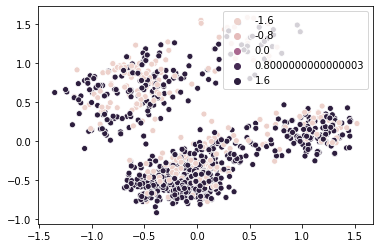

In [2]:
data_embedding = pca.fit_transform(X)
sns.scatterplot(data_embedding[:, 0], data_embedding[:, 1], hue=y)
np.unique(y, return_counts=True)

(array([-1,  1]), array([126, 224]))

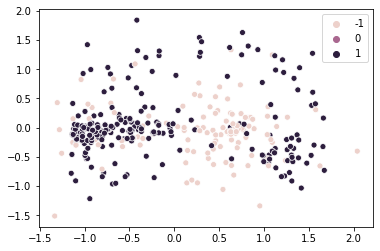

In [18]:
X, y = read_dataset('ionosphere')
data_embedding = pca.fit_transform(X)
sns.scatterplot(data_embedding[:, 0], data_embedding[:, 1], hue=y)
np.unique(y, return_counts=True)

(array([-1.,  1.]), array([2788, 1812]))

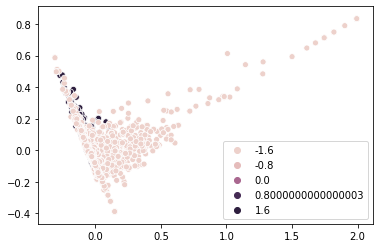

In [4]:
X, y = read_dataset('spambase')
data_embedding = pca.fit_transform(X)
sns.scatterplot(data_embedding[:, 0], data_embedding[:, 1], hue=y)
np.unique(y, return_counts=True)

0.01 0.16490217391304346


In [19]:
lr = 0.1
fold_error_rates = []
folds = 20



for f in range(folds):
    w = np.zeros(len(X[0]))
    error_count = 0
    l = list(range(len(X)))
    np.random.shuffle(l)
    X, y = X[l], y[l]


    for i in range(len(X)):
        y_hat = np.sign(np.dot(w, X[i]))
        
        if y_hat != y[i]:
            w += lr * X[i] * y[i]
            error_count += 1

    fold_error_rates.append(error_count/len(X))

print(lr, np.mean(fold_error_rates))

0.1 0.358
